Train Data (first 5 lines):
aaa, aaaaaa, aaas, aachen, aaee

Test Data (first 5 lines):
a, aah, aahing, aalii, aals

Number of words in Train Data: 227300
Number of words in Test Data: 170671

Number of words in Train Data Without Duplicates: 227300
Number of words in Test Data Without Duplicates: 170671

Train Data - Word Length Distribution:
Length 1: 17 words
Length 2: 264 words
Length 3: 2201 words
Length 4: 5287 words
Length 5: 11274 words
Length 6: 19541 words
Length 7: 25948 words
Length 8: 30452 words
Length 9: 30906 words
Length 10: 26953 words
Length 11: 22786 words
Length 12: 18178 words
Length 13: 12956 words
Length 14: 8710 words
Length 15: 5211 words
Length 16: 3143 words
Length 17: 1775 words
Length 18: 859 words
Length 19: 441 words
Length 20: 225 words
Length 21: 98 words
Length 22: 44 words
Length 23: 14 words
Length 24: 9 words
Length 25: 3 words
Length 27: 2 words
Length 28: 1 words
Length 29: 2 words

Test Data - Word Length Distribution:
Length 1: 2 words
Length 2

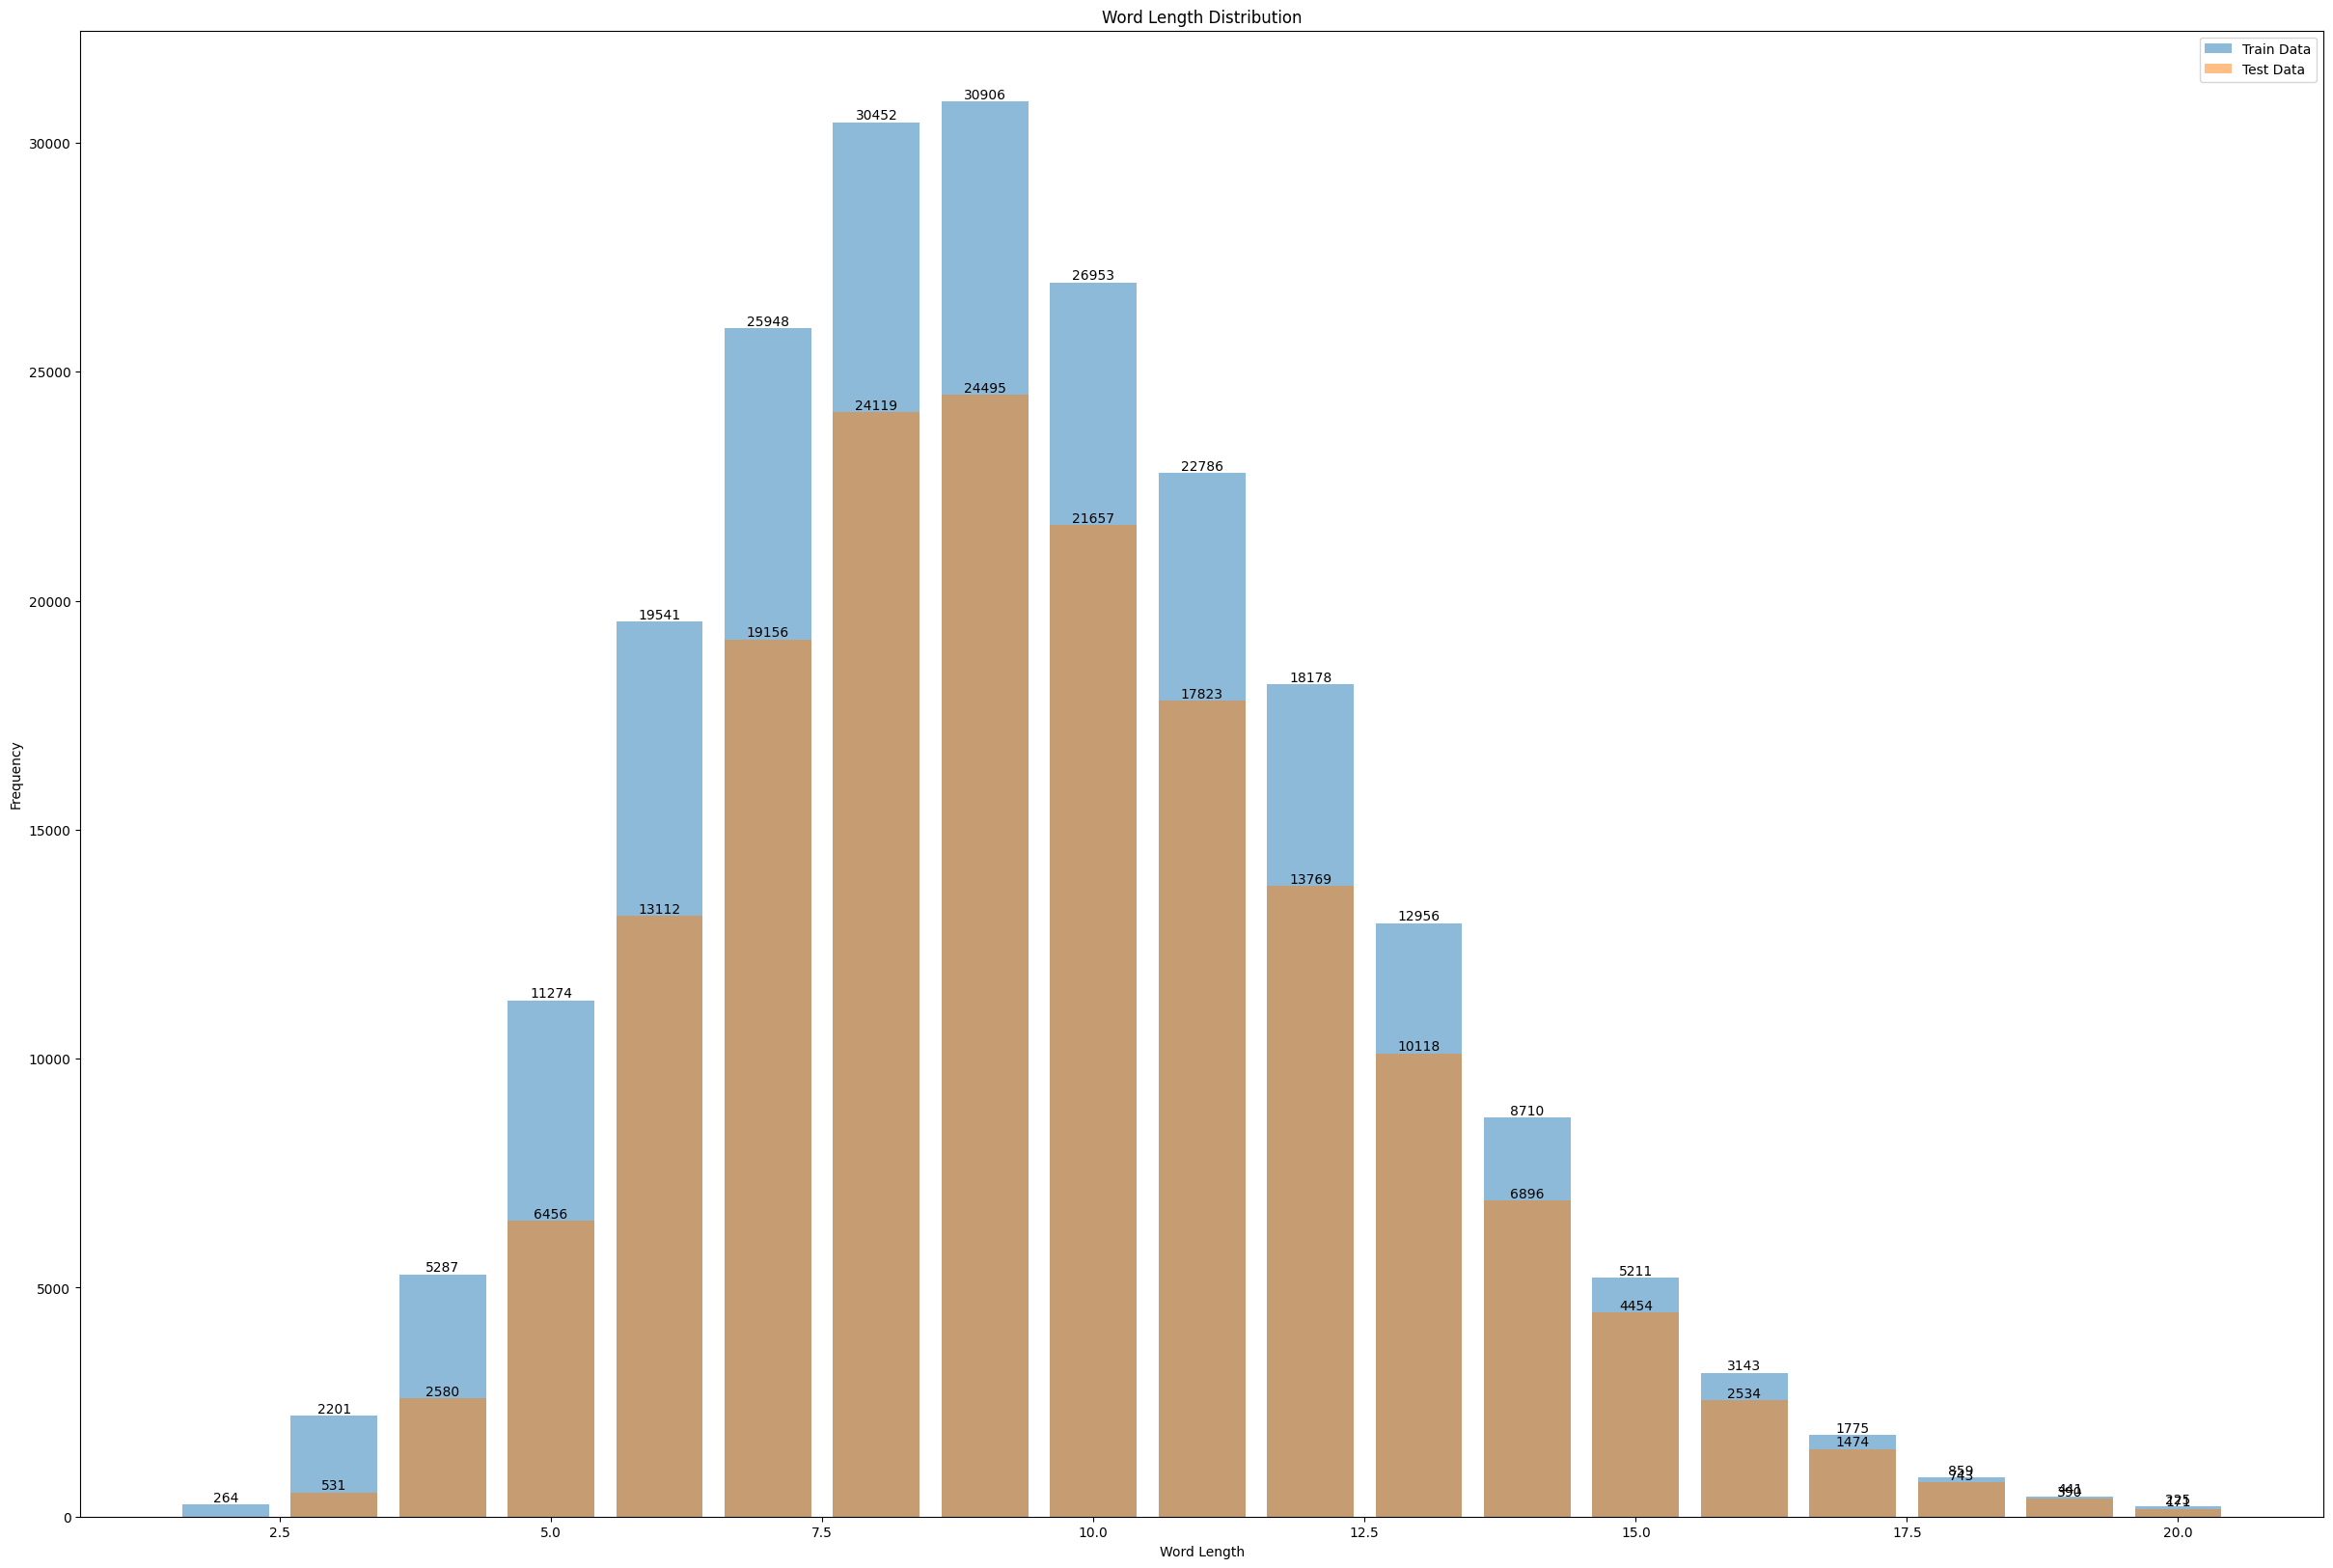


Top 20 longest words in Train Data:
cyclotrimethylenetrinitramine: 29 characters
trinitrophenylmethylnitramine: 29 characters
halfembracinghalfembracingly: 28 characters
hydroxydesoxycorticosterone: 27 characters
microspectrophotometrically: 27 characters
antidisestablishmentarian: 25 characters
electroencephalographical: 25 characters
superincomprehensibleness: 25 characters
diphenylaminechlorarsine: 24 characters
electrocardiographically: 24 characters
formaldehydesulphoxylate: 24 characters
magnetothermoelectricity: 24 characters
pathologicopsychological: 24 characters
preobtrudingpreobtrusion: 24 characters
pseudointernationalistic: 24 characters
scientificophilosophical: 24 characters
thyroparathyroidectomize: 24 characters
chlorotrifluoroethylene: 23 characters
desoxyribonucleoprotein: 23 characters
dihdroxycholecalciferol: 23 characters

Top 20 longest words in Test Data:
pneumonoultramicroscopicsilicovolcanoconiosis: 45 characters
dichlorodiphenyltrichloroethane: 31 characters

In [20]:
# This is a Jupyter notebook for exploratory data analysis (EDA)

import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Function to load data
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read().splitlines()
    return data

# Paths to data
train_data_path = "../data/train/words_train.txt"
test_data_path = "../data/test/words_test.txt"

# Load train and test data
train_data = load_data(train_data_path)
test_data = load_data(test_data_path)

# Display first few lines of train and test data
print("Train Data (first 5 lines):")
print(", ".join(train_data[:5]))

print("\nTest Data (first 5 lines):")
print(", ".join(test_data[:5]))

# Get number of words in train and test sets
num_train_words = len(train_data)
num_test_words = len(test_data)

print(f"\nNumber of words in Train Data: {num_train_words}")
print(f"Number of words in Test Data: {num_test_words}")

print(f"\nNumber of words in Train Data Without Duplicates: {len(set(train_data))}")
print(f"Number of words in Test Data Without Duplicates: {len(set(test_data))}")

# Ensure all words are unique in both train and test sets
assert len(train_data) == len(set(train_data)), "Train set contains duplicate words."
assert len(test_data) == len(set(test_data)), "Test set contains duplicate words."

# Print number of words per length for both train and test separately
def word_length_distribution(words):
    length_counts = Counter(len(word) for word in words)
    return length_counts

train_word_lengths = word_length_distribution(train_data)
test_word_lengths = word_length_distribution(test_data)

# Threshold for word count
k = 100

print("\nTrain Data - Word Length Distribution:")
for length, count in sorted(train_word_lengths.items()):
    print(f"Length {length}: {count} words")

print("\nTest Data - Word Length Distribution:")
for length, count in sorted(test_word_lengths.items()):
    print(f"Length {length}: {count} words")

# Print outliers and their words
def print_outliers(data, threshold, label):
    print(f"\nOutliers in {label}:")
    length_counts = word_length_distribution(data)
    outliers = [word for word in data if length_counts[len(word)] < threshold]
    outlier_lengths = word_length_distribution(outliers)
    for length, count in sorted(outlier_lengths.items()):
        print(f"Length {length}: {count} words")
        print(f"Words: {', '.join([word for word in outliers if len(word) == length])}")

print_outliers(train_data, k, "Train Data")
print_outliers(test_data, k, "Test Data")

# Plot word length distribution for both train and test, excluding outliers
def plot_word_length_distribution(train_lengths, test_lengths, threshold):
    filtered_train_lengths = {length: count for length, count in train_lengths.items() if count >= threshold}
    filtered_test_lengths = {length: count for length, count in test_lengths.items() if count >= threshold}
    
    plt.figure(figsize=(30, 20))
    
    # Plot train data
    train_bars = plt.bar(filtered_train_lengths.keys(), filtered_train_lengths.values(), alpha=0.5, label='Train Data')
    for bar in train_bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
    
    # Plot test data
    test_bars = plt.bar(filtered_test_lengths.keys(), filtered_test_lengths.values(), alpha=0.5, label='Test Data')
    for bar in test_bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
    
    plt.legend(loc='upper right')
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.title('Word Length Distribution')
    plt.show()

plot_word_length_distribution(train_word_lengths, test_word_lengths, k)

# Additional EDA: Top 20 longest words in train and test sets
train_data_sorted_by_length = sorted(train_data, key=len, reverse=True)
test_data_sorted_by_length = sorted(test_data, key=len, reverse=True)

top_20_longest_train_words = train_data_sorted_by_length[:20]
top_20_longest_test_words = test_data_sorted_by_length[:20]

print("\nTop 20 longest words in Train Data:")
for word in top_20_longest_train_words:
    print(f"{word}: {len(word)} characters")

print("\nTop 20 longest words in Test Data:")
for word in top_20_longest_test_words:
    print(f"{word}: {len(word)} characters")